In [13]:
import numpy as np
from skimage.io import imread
from skimage.segmentation import slic
from skimage.color import label2rgb
import matplotlib.pyplot as plt

In [14]:
rgb_image = imread('0001_rgb.png')
label_image = imread('0001_label.png')

(np.float64(-0.5), np.float64(560.5), np.float64(426.5), np.float64(-0.5))

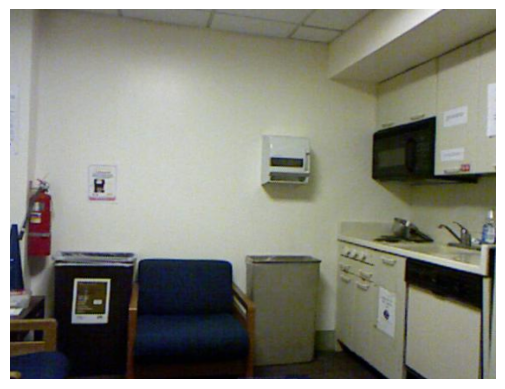

In [15]:
plt.imshow(rgb_image)
plt.axis('off')

(np.float64(-0.5), np.float64(560.5), np.float64(426.5), np.float64(-0.5))

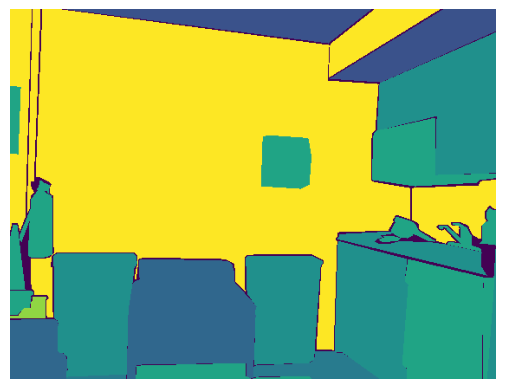

In [16]:
plt.imshow(label_image)
plt.axis('off')

In [17]:

# Apply SLIC segmentation
segments = slic(rgb_image, n_segments=100, compactness=10, start_label=1)

(np.float64(-0.5), np.float64(560.5), np.float64(426.5), np.float64(-0.5))

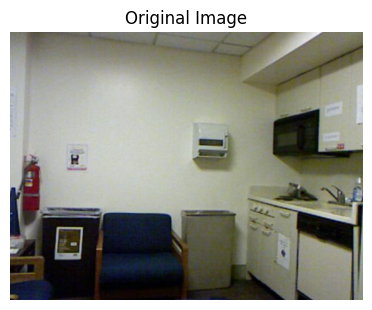

In [18]:
# Visualize the segmentation result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title("Original Image")
plt.axis('off')

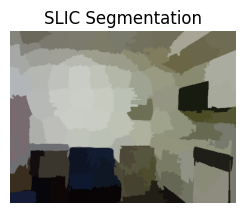

In [19]:
plt.subplot(1, 2, 2)
plt.imshow(label2rgb(segments, rgb_image, kind='avg'))
plt.title("SLIC Segmentation")
plt.axis('off')
plt.show()


In [20]:
# Function to calculate undersegmentation error
def calculate_undersegmentation_error(label_image, segments):
    unique_labels = np.unique(label_image)
    errors = []
    
    for label in unique_labels:
        if label == 0:  # Skip unlabeled regions
            continue
        
        # Mask for the current ground truth segment
        mask = (label_image == label)
        
        # Find overlapping segments
        overlapping_segments = np.unique(segments[mask])
        
        # Calculate the area of each overlapping segment
        total_area = 0
        for seg in overlapping_segments:
            seg_area = np.sum(segments == seg)
            total_area += seg_area
        
        # Calculate the ground truth area
        gt_area = np.sum(mask)
        
        # Calculate undersegmentation error
        error = (total_area - gt_area) / gt_area
        errors.append(error)
        print(f"Undersegmentation error for segment {label}: {error:.4f}")
    
    # Compute the average undersegmentation error
    avg_error = np.mean(errors)
    print(f"Average undersegmentation error: {avg_error:.4f}")
    return avg_error

In [21]:
# Calculate and print errors
average_error = calculate_undersegmentation_error(label_image, segments)

Undersegmentation error for segment 3: 1.3441
Undersegmentation error for segment 4: 1.4507
Undersegmentation error for segment 5: 3.3429
Undersegmentation error for segment 6: 1.0013
Undersegmentation error for segment 7: 1.8831
Undersegmentation error for segment 10: 10.0660
Undersegmentation error for segment 12: 0.4615
Average undersegmentation error: 2.7928


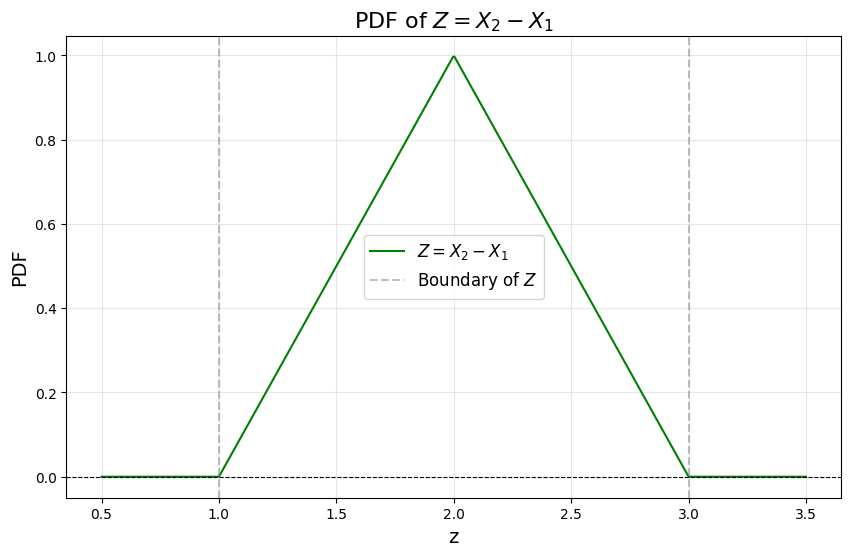

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of Z and its PDF based on the piecewise function
z = np.linspace(0.5, 3.5, 500)
pdf_z = np.piecewise(z,
                     [z < 1, (z >= 1) & (z <= 2), (z > 2) & (z <= 3), z > 3],
                     [0, lambda z: z - 1, lambda z: 3 - z, 0])

# Plot the PDF of Z = X2 - X1
plt.figure(figsize=(10, 6))
plt.plot(z, pdf_z, label=r'$Z = X_2 - X_1$', color='green')
plt.title('PDF of $Z = X_2 - X_1$', fontsize=16)
plt.xlabel('z', fontsize=14)
plt.ylabel('PDF', fontsize=14)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(1, color='gray', linestyle='--', alpha=0.5, label='Boundary of $Z$')
plt.axvline(3, color='gray', linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()